In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
def read_json(json_path):
    return json.load(open(json_path, 'r'))

# Inspect Time

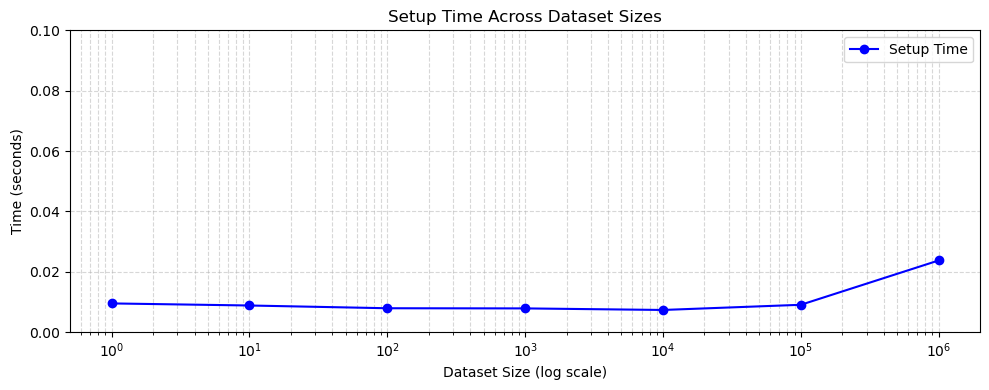

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assume JSON already loaded
benchmark_data = read_json('logs/inspect_time_across_num_docs_logs.json')
results = benchmark_data["results"]

# Extract values
dataset_sizes = [entry["dataset_size"] for entry in results]
setup_times = [entry["setup_time"] for entry in results]
mean_sampling_times = [entry["mean_sampling_time"] for entry in results]
variances = [entry["variance_sampling_time"] for entry in results]
std_devs = np.sqrt(variances)

# --- Plot 1: Setup Time ---
plt.figure(figsize=(10, 4))
plt.plot(dataset_sizes, setup_times, marker='o', color='blue', label='Setup Time')
plt.xscale('log')
plt.ylim(0, 0.1)
plt.xlabel('Dataset Size (log scale)')
plt.ylabel('Time (seconds)')
plt.title('Setup Time Across Dataset Sizes')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
# plt.show()

# Save the plot
plt.savefig('plots/setup_time_across_dataset_sizes.pdf', bbox_inches='tight', dpi=500)


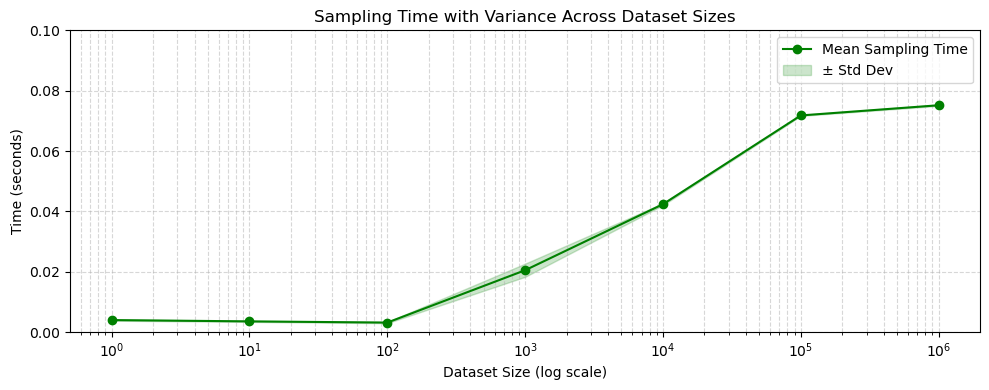

In [19]:
# --- Plot 2: Sampling Time with Variance ---
plt.figure(figsize=(10, 4))
plt.plot(dataset_sizes, mean_sampling_times, marker='o', color='green', label='Mean Sampling Time')
plt.fill_between(
    dataset_sizes,
    np.array(mean_sampling_times) - std_devs,
    np.array(mean_sampling_times) + std_devs,
    color='green',
    alpha=0.2,
    label='± Std Dev'
)
plt.xscale('log')
plt.ylim(0, 0.1)
plt.xlabel('Dataset Size (log scale)')
plt.ylabel('Time (seconds)')
plt.title('Sampling Time with Variance Across Dataset Sizes')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
# plt.show()

plt.savefig('plots/sampling_time_across_dataset_sizes.pdf', bbox_inches='tight', dpi=500)

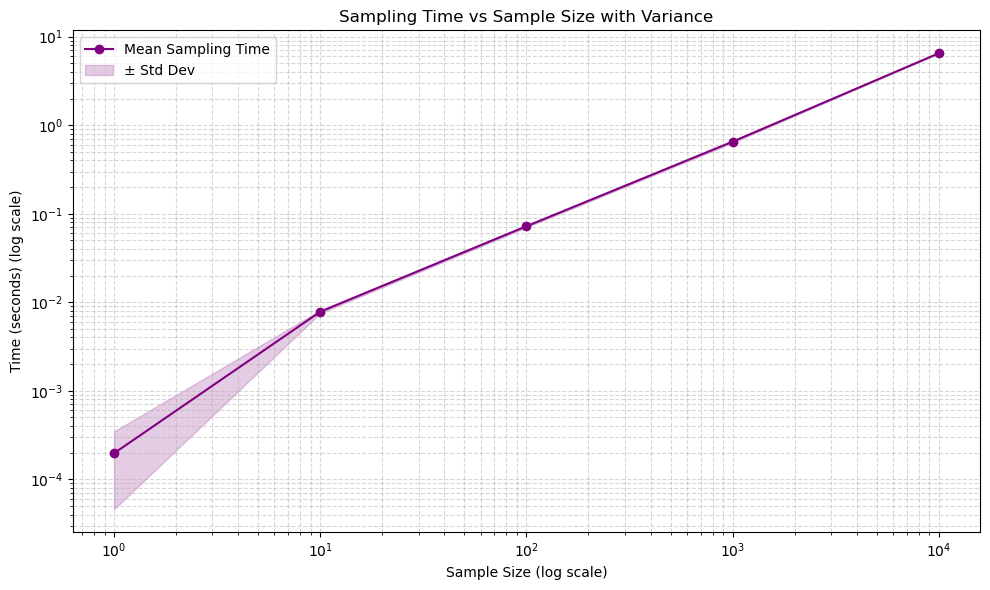

In [20]:
benchmark_data = read_json('logs/inspect_time_across_num_samples_log.json')

# Extract from structure
results = benchmark_data["results"]

sample_sizes = [entry["sample_size"] for entry in results]
mean_sampling_times = [entry["mean_sampling_time"] for entry in results]
variances = [entry["variance_sampling_time"] for entry in results]
std_devs = np.sqrt(variances)

# Plotting
plt.figure(figsize=(10, 6))

# Plot sampling time with variance
plt.plot(sample_sizes, mean_sampling_times, label='Mean Sampling Time', marker='o', color='purple')
plt.fill_between(
    sample_sizes,
    np.array(mean_sampling_times) - std_devs,
    np.array(mean_sampling_times) + std_devs,
    color='purple',
    alpha=0.2,
    label='± Std Dev'
)

# Log scale for x-axis
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Time (seconds) (log scale)')
plt.title('Sampling Time vs Sample Size with Variance')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.show()

plt.savefig('plots/sampling_time_across_num_samples.pdf', bbox_inches='tight', dpi=500)


# Edit Time

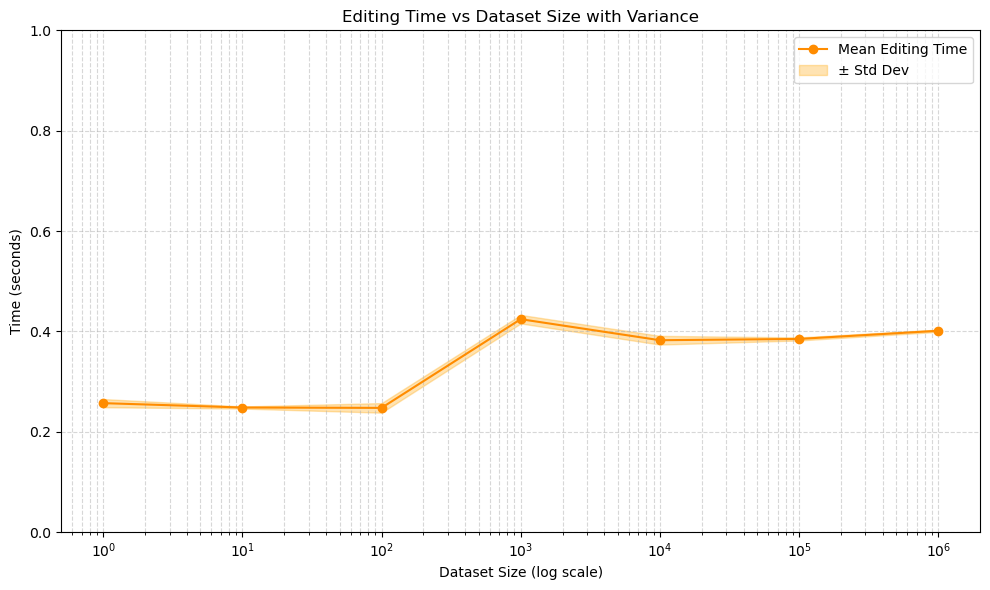

In [21]:
import matplotlib.pyplot as plt
import numpy as np

benchmark_data = read_json('logs/edit_time_across_num_docs_logs.json')

results = benchmark_data["results"]

dataset_sizes = [entry["dataset_size"] for entry in results]
mean_editing_times = [entry["mean_editing_time"] for entry in results]
variances = [entry["variance_editing_time"] for entry in results]
std_devs = np.sqrt(variances)

# Plotting
plt.figure(figsize=(10, 6))

# Plot editing times with shaded std deviation
plt.plot(dataset_sizes, mean_editing_times, label='Mean Editing Time', marker='o', color='darkorange')
plt.fill_between(
    dataset_sizes,
    np.array(mean_editing_times) - std_devs,
    np.array(mean_editing_times) + std_devs,
    color='orange',
    alpha=0.3,
    label='± Std Dev'
)

# Set y axis to 0 to 1 seconds
plt.ylim(0, 1)

# Log scale for x-axis
plt.xscale('log')
plt.xlabel('Dataset Size (log scale)')
plt.ylabel('Time (seconds)')
plt.title('Editing Time vs Dataset Size with Variance')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.show()

plt.savefig('plots/editing_time_across_dataset_sizes.pdf', bbox_inches='tight', dpi=500)


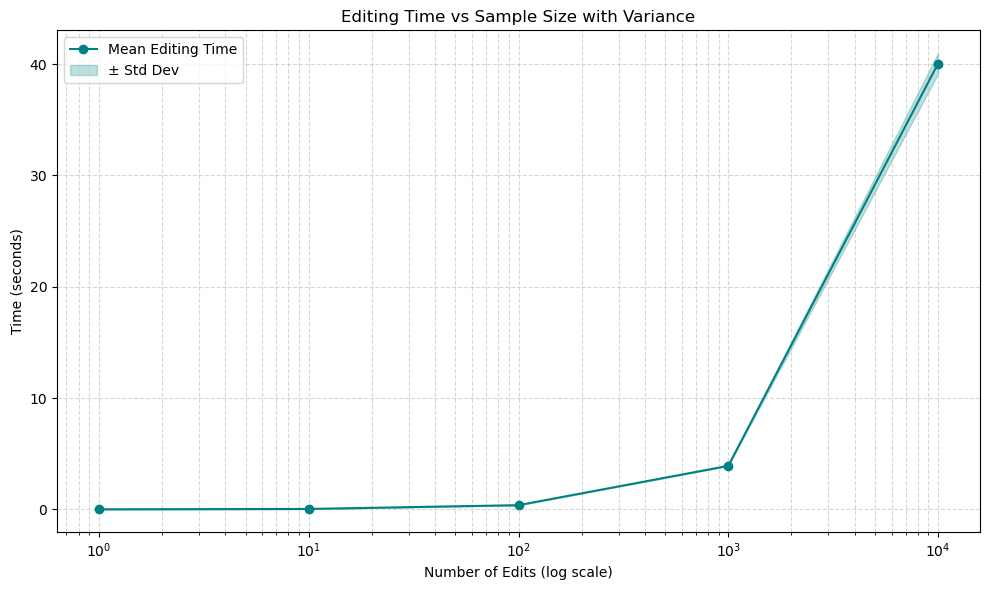

In [22]:
import matplotlib.pyplot as plt
import numpy as np

benchmark_data = read_json('logs/edit_time_across_num_samples_log.json')

results = benchmark_data["results"]

sample_sizes = [entry["sample_size"] for entry in results]
mean_editing_times = [entry["mean_editing_time"] for entry in results]
variances = [entry["variance_editing_time"] for entry in results]
std_devs = np.sqrt(variances)

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean editing times
plt.plot(sample_sizes, mean_editing_times, label='Mean Editing Time', marker='o', color='teal')
plt.fill_between(
    sample_sizes,
    np.array(mean_editing_times) - std_devs,
    np.array(mean_editing_times) + std_devs,
    color='teal',
    alpha=0.25,
    label='± Std Dev'
)

# Log scale for x-axis
plt.xscale('log')
plt.xlabel('Number of Edits (log scale)')
plt.ylabel('Time (seconds)')
plt.title('Editing Time vs Sample Size with Variance')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.show()

plt.savefig('plots/editing_time_across_num_samples.pdf', bbox_inches='tight', dpi=500)
